In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
data_training = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

## Deteksi Wajah dengan Gambar

In [3]:
data_testing = cv2.imread('C:/Users/Latitude 5480/Downloads/komvis/komvis/th.jpg')

In [4]:
konversi_grayscale = cv2.cvtColor(data_testing, cv2.COLOR_BGR2GRAY)

(-0.5, 269.5, 179.5, -0.5)

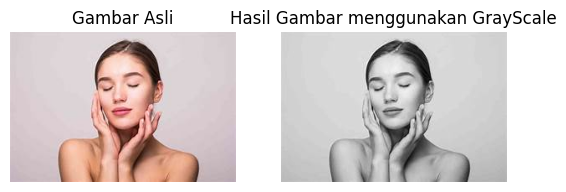

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(data_testing, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(konversi_grayscale, cmap='gray')
plt.title('Hasil Gambar menggunakan GrayScale')
plt.axis('off')

In [6]:
model_data = data_training.detectMultiScale(konversi_grayscale, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [7]:
for (x, y, w, h) in model_data:
    cv2.rectangle(data_testing, (x, y), (x + w, y + h), (160,82,45), 2)

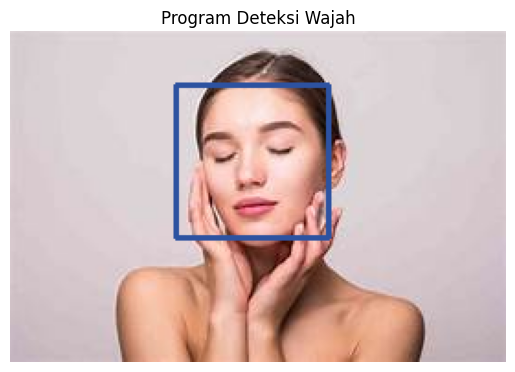

In [8]:
plt.imshow(cv2.cvtColor(data_testing, cv2.COLOR_BGR2RGB))
plt.title('Program Deteksi Wajah')
plt.axis('off')
plt.show()

## Deteksi Wajah secara Real-Time dengan Kamera

In [10]:
cap = cv2.VideoCapture(1)

In [ ]:
if not cap.isOpened():
    print("Maaf, gagal membuka kamera!")
    exit()

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame dari kamera.")
        break

    konversi_grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    model_data = data_training.detectMultiScale(konversi_grayscale, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in model_data:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, 'Wajah Ditemukan', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow('Deteksi Wajah', frame)

    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()